# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [1]:
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


In [3]:
data['reviews'][3]

'I participated in a product review that included a sample of <a href="http://www.amazon.com/gp/product/B007JFMH8M">Quaker Soft Baked Oatmeal Cookie, Raisins, 8.8-Ounce (Pack of 12)</a>.  Okay first of all I love Oatmeal Raisin cookies and this one was no exception.  It was great!!! Soft n chewy, nice portion size and and as always a high quality product from Quaker Oats.  Thanks to Quaker and Influenster to for including this in their Mom Voxbox.  If you haven\'t tried it you need to and make sure to share it with the family.'

## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [4]:
print('There are {} rows and {} coloumns '.format(data.shape[0],data.shape[1]))

There are 913 rows and 3 coloumns 


In [5]:
data_stars = (data.groupby('stars').size())
print(data_stars)

stars
1      4
2     12
3     56
4    217
5    624
dtype: int64


In [6]:
char_length = []
for i in range(data.shape[0]):
    char_length.append(len(data.loc[i,'reviews']))
print(len(char_length))

913


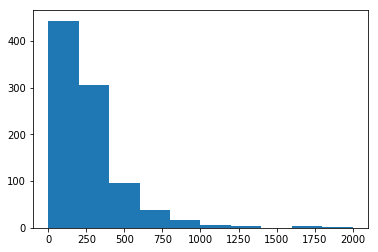

In [7]:
plt.hist(char_length,bins = 10,range = [0,2000])
plt.show()

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [8]:
data.iloc[0,2]

'I love these cookies!  Not only are they healthy but they taste great and are so soft!  I will definitely add these to my grocery list!'

In [9]:
data.loc[:,"reviews"] = data.reviews.apply(lambda x : str.lower(x))

In [10]:
data.loc[:,"reviews"] = data.reviews.apply(lambda x : " ".join(re.findall('[\w]+',x))) #removing punctuations and numbers

In [11]:
from nltk.corpus import stopwords
stopwords_english = set(stopwords.words('english'))
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stopwords_english)
    return s

data.loc[:,"reviews"] = data.reviews.apply(lambda x: remove_stopWords(x))

In [12]:
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,love cookies healthy taste great soft definite...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies raisins deli...
2,A2Z9JNXPIEL2B9,5,usually huge fan oatmeal cookies literally mel...
3,A31CYJQO3FL586,5,participated product review included sample hr...
4,A2KXQ2EKFF3K2G,5,kids loved pleased give kids quick go healthy ...


## Question 3 ##

* Apply the following preprocessing techniques:


     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [13]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
data.loc[:,"stemming"] = data.reviews.apply(lambda x:stemmer.stem(x))
data.head()

,user_id,stars,reviews,stemming
0,A368Z46FIKHSEZ,5,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...
2,A2Z9JNXPIEL2B9,5,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...
3,A31CYJQO3FL586,5,participated product review included sample hr...,participated product review included sample hr...
4,A2KXQ2EKFF3K2G,5,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...


In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data.loc[:,"lemmatizer"] = data.reviews.apply(lambda x:lemmatizer.lemmatize(x))
data.head()

,user_id,stars,reviews,stemming,lemmatizer
0,A368Z46FIKHSEZ,5,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...
2,A2Z9JNXPIEL2B9,5,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...
3,A31CYJQO3FL586,5,participated product review included sample hr...,participated product review included sample hr...,participated product review included sample hr...
4,A2KXQ2EKFF3K2G,5,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...


In [15]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
data.loc[:,'pos_tagging'] = data.reviews.apply(lambda x:pos_tag(word_tokenize(x)))
data.head()

,user_id,stars,reviews,stemming,lemmatizer,pos_tagging
0,A368Z46FIKHSEZ,5,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...,"[(love, VB), (cookies, NNS), (healthy, JJ), (t..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...,"[(quaker, NN), (soft, JJ), (baked, VBD), (oatm..."
2,A2Z9JNXPIEL2B9,5,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...,"[(usually, RB), (huge, JJ), (fan, NN), (oatmea..."
3,A31CYJQO3FL586,5,participated product review included sample hr...,participated product review included sample hr...,participated product review included sample hr...,"[(participated, JJ), (product, NN), (review, N..."
4,A2KXQ2EKFF3K2G,5,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...,"[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."


In [16]:
from nltk.chunk import ne_chunk
data.loc[:,'ner'] = data.reviews.apply(lambda x:ne_chunk(pos_tag(word_tokenize(x))))
data.head()

,user_id,stars,reviews,stemming,lemmatizer,pos_tagging,ner
0,A368Z46FIKHSEZ,5,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...,love cookies healthy taste great soft definite...,"[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[(love, VB), (cookies, NNS), (healthy, JJ), (t..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...,quaker soft baked oatmeal cookies raisins deli...,"[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm..."
2,A2Z9JNXPIEL2B9,5,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...,usually huge fan oatmeal cookies literally mel...,"[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea..."
3,A31CYJQO3FL586,5,participated product review included sample hr...,participated product review included sample hr...,participated product review included sample hr...,"[(participated, JJ), (product, NN), (review, N...","[(participated, JJ), (product, NN), (review, N..."
4,A2KXQ2EKFF3K2G,5,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...,kids loved pleased give kids quick go healthy ...,"[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text = cv.fit_transform(["Hi i am Abhinav Kumar jha learning the japanese language"])
print(text)

  (0, 6)	1
  (0, 3)	1
  (0, 8)	1
  (0, 7)	1
  (0, 4)	1
  (0, 5)	1
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1


In [18]:
pd.DataFrame(text.toarray(), columns=cv.get_feature_names())

,abhinav,am,hi,japanese,jha,kumar,language,learning,the
0,1,1,1,1,1,1,1,1,1


### Entity drawing from tokens

In [20]:
my_text = 'abhinav is living in united states and abhijeet is living in vadodara in national rail and transport institute'
word_tokens = word_tokenize(my_text)
word_tags = pos_tag(word_tokens)
entity = ne_chunk(word_tags)
entity.draw()

### Compound Term extraction

In [22]:
from nltk.tokenize import MWETokenizer
mwetokenize = MWETokenizer([('You','all'),('of','all','time')])
my_text = 'You all are the greatest person of all time'
word_tokens = mwetokenize.tokenize(word_tokenize(my_text))
print(word_tokens)

['You_all', 'are', 'the', 'greatest', 'person', 'of_all_time']
